# Importing the Necessary Libraries for Gold Prediction Project

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing 

In [ ]:
# load the dataset csv dataset to pandas dataframe

gold = pd.read_csv('gld_price_data.csv')
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [6]:
# print first 5 rows
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows

gold.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold.shape

(2290, 6)

In [10]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

# Get statistics measuses for data

In [13]:
gold.describe(include='all')

,Date,SPX,GLD,USO,SLV,EUR/USD
count,2290,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
unique,2290,NaN,NaN,NaN,NaN,NaN
top,1/2/2008,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,1654.315776,122.732875,31.842221,20.084997,1.283653
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547
min,NaN,676.530029,70.000000,7.960000,8.850000,1.039047
25%,NaN,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,NaN,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,NaN,2073.010070,132.840004,37.827501,22.882500,1.369971


# Find the Correlation in data

In [17]:
corr = gold.corr(numeric_only= True)
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


# Heatmap

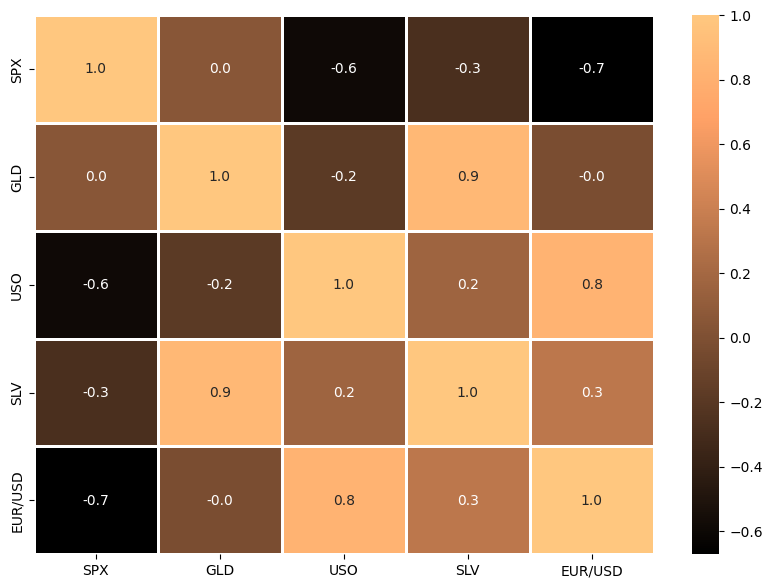

In [20]:
fig , ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr,linewidths=0.95,annot=True,cmap='copper',fmt='.1f')
plt.show()

In [21]:
# Correlation values GLD 
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Find the Distribution of Gold Values

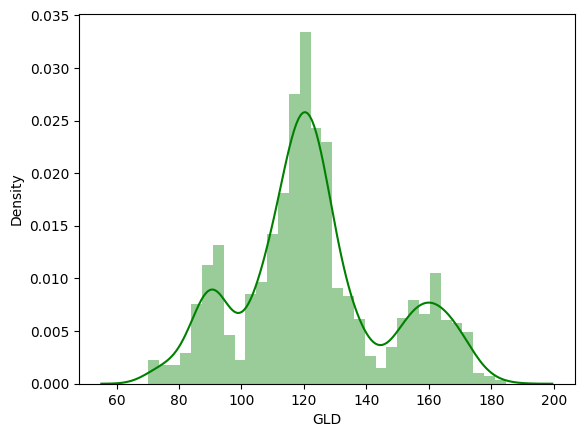

In [23]:
sns.distplot(gold['GLD'],color='green')
plt.show()

# Splitting the Features and Target

In [29]:
x = gold.drop(['Date','GLD'],axis=1)
y = gold['GLD']

# Splitting the Train and Test

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


# Model Training

In [36]:
model = RandomForestRegressor(n_estimators=100)

In [37]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
predictions = model.predict(x_test)

In [40]:
predictions

array([168.27519946,  82.12519974, 115.8557997 , 127.72090075,
       120.54630115, 154.66709667, 150.26369851, 126.07700079,
       117.60459874, 125.96110078, 116.68620057, 172.04990108,
       141.77109912, 167.88269866, 115.28720032, 118.0183005 ,
       137.35890304, 170.10290094, 158.78770332, 157.78339924,
       155.12880009, 125.09920018, 175.99289975, 156.69720354,
       125.17930088,  93.81249963,  77.06870015, 120.57900016,
       119.04799955, 167.58879975,  88.11910072, 125.38060012,
        91.30830075, 117.8666999 , 121.15479926, 136.66260075,
       115.60390101, 115.15180051, 147.09040006, 107.07800094,
       104.65590244,  87.03969781, 126.53220053, 117.89510028,
       152.87939927, 119.53220033, 108.3737    , 108.25709819,
        93.27440042, 127.14919768,  75.14170036, 113.71969918,
       121.56589973, 111.33549899, 118.97089912, 120.94689941,
       159.03199856, 167.71030102, 147.15609757,  85.74189869,
        94.25910031,  86.90399911,  90.58960014, 118.91